In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
#https://www.kaggle.com/azzion/svm-for-beginners-tutorial/notebook
#https://www.kaggle.com/gulsahdemiryurek/mobile-price-classification-with-svm
#Mobile Price Classification
#The below topics are covered in this Kernal.

#1. Data prepocessing
#2. Target value Analysis
#3. SVM
#4. Linear SVM
#5. SV Regressor
#6. Non Linear SVM with kernal - RBF ( note: you can also try poly )
#7. Non Linear SVR
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
# A.DATA PREPROCESSING
# save filepath to variable for easier access
train_file_path = './datasets/train.csv'
test_file_path = './datasets/test.csv'
df = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
#B. TARGET VALUE ANALYSIS
#understanding the predicted value - which is hot encoded, in real life price won't be hot encoded.
df['price_range'].describe(), df['price_range'].unique()

# there are 4 classes in the predicted value

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0], dtype=int64))

<AxesSubplot:>

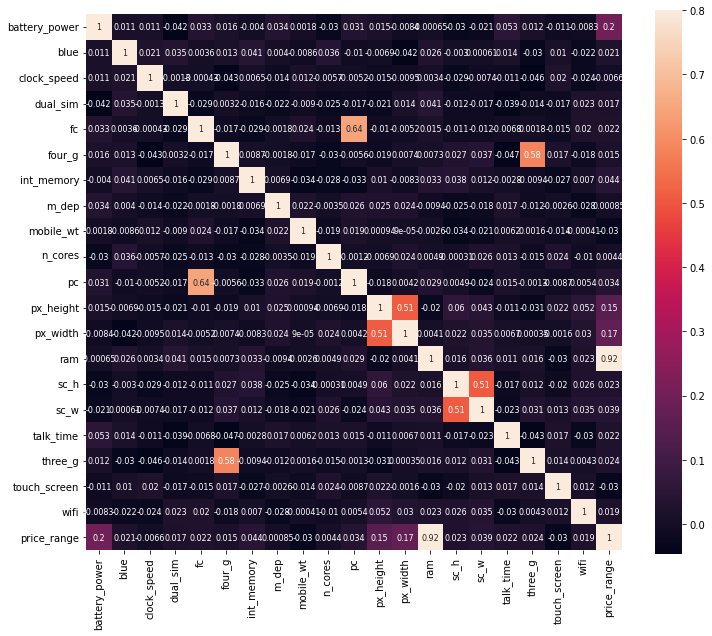

In [9]:
#correlation matrix with heatmap (mencari korelasi antar features, salah satu teknik features selection)
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

In [10]:
#price range correlation
corrmat.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

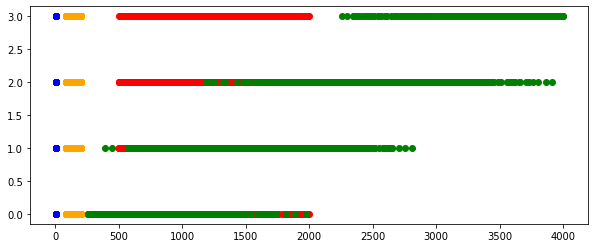

In [11]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='orange')
# clearly we can see that each of the category has different set of value ranges

In [12]:
# SUPPORT VECTOR MACHINES AND METHODS :
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler #(scaling rentang 0-1)
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [14]:
for this_C in [1,3,5,10,40,60,80,100]: #parameter C di SVM Linier
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train) #clf = cross validate metrics for evaluating classification
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [15]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [16]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.23
Test Stratergy :stratified 
 Score :0.25
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.23
Test Stratergy :uniform 
 Score :0.24


In [17]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [18]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

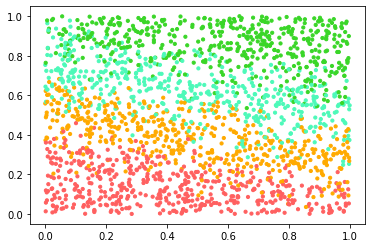

In [19]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()


<ipython-input-20-7318cbc697ae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
<ipython-input-20-7318cbc697ae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


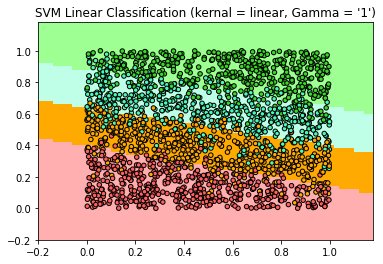

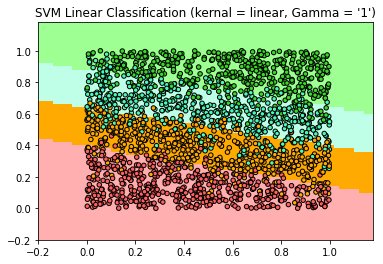

In [20]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [21]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [22]:
# Linear Support vector machine with only C Parameter 
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:5, training score :0.866875 , Test Score: 0.872500 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:10, training score :0.871875 , Test Score: 0.870000 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:40, training score :0.783750 , Test Score: 0.792500 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:60, training score :0.773750 , Test Score: 0.782500 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:80, training score :0.822500 , Test Score: 0.827500 

Linear SVM value of C:100, training score :0.747500 , Test Score: 0.742500 



c:\users\qd\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [23]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


In [24]:
#NON LINIER SVM
# SMV with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.969375 Test Score : 0.862500

SVM for Non Linear 
 C:5 Training Score : 0.998750 Test Score : 0.872500

SVM for Non Linear 
 C:10 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:25 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:50 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:100 Training Score : 1.000000 Test Score : 0.877500



In [25]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [26]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [27]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]})

In [28]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.90.


In [29]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

1.00 is the accuracy of the SV Regressor


In [30]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [31]:
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)

In [32]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [33]:
prediction = svr2.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,1.443312
1,1.443312
2,1.443312
3,1.443312
4,1.443312
